### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

```
`# This is formatted as code`
```


    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [6]:
# Check for missing values
print(data.isnull().sum().sort_values())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
toCoupon_GEQ25min           0
direction_same              0
Y                           0
direction_opp               0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64


Out of the total 12,685 rows in this dataset, car cloumn/Series has NaN in 12,576. Therefore, this column can be removed as we cannot derive any useful patterns. Five other fields have relatively low count of NaN values. If required for analysis, they can be assigned some values like "0".

In [7]:
# Check data types, observed that many columns which ideally should have int data types are currently objects
print(data.dtypes)

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


In [8]:
data['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [10]:
# count of cells in age column with value "50plus" and "below21"

print(data[data['age'] == '50plus']['age'].count())
print(data[data['age'] == 'below21']['age'].count())

data['RestaurantLessThan20'].unique()

1788
547


array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

Many fields have "object" data type which is mixed. Fields like age can be used for numeric analysis but it has values such as "below21" or "50plus". Depending on analysis this can be assigned a lower or higher numeric value to calculate "below 21 or higher than 51" scenarios.

Similarly, many columns such as "Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20"and "Restaurant20To50" have values like "13" , '48', 'gt8', 'never', 'less1' and NaN. Replacing them with integers for numeric analysis such as "less1" replaced with 0, "gt8" replaced with 9, "1~3" replaced with 3 and so on

3. Decide what to do about your missing data -- drop, replace, other...

Out of the total 12,685 rows in this dataset, car field has no data in 12,576. Therefore, this field can be removed as we cannot derive any useful patterns.

In [11]:
# Drop the 'car' column since 99% of cells does not have any value and hence it is not useful for data analysis.

data = data.drop('car', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [12]:
# Replace rest of the NaN values in the data dataframe with 0 as the total NaN values are small part of the dataset overall

data = data.dropna()
print (len(data))

12079


Close to 600 rows dropped

Total NaN values are relatively lower and does not have significant impact of size of the dataset, therefore dropped them

In [13]:
# In column age, replace value "50plus" with 50 and "below21" with 20, then change the type of column age as int

import pandas as pd
# Replace values in the 'age' column
data['age'] = data['age'].replace({'50plus': 50, 'below21': 20})

# Convert the 'age' column to numeric type
data['age'] = pd.to_numeric(data['age'])

# Many columns such as "Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20"and "Restaurant20To50" have values like '1~3', '4~8', 'gt8', 'never', 'less1' and NaN
# Replacing them with integers for numeric analysis such as less1 replaced with 0, "gt8" replaced with 9, "1~3" replaced with 3 and so on

data['Bar'] = data['Bar'].replace({'1~3': 3, '4~8': '8', 'gt8': '9', 'never' : '0', 'less1' : '0', np.nan: '0' })
data['Bar'] = data['Bar'].astype(int)

data['CoffeeHouse'] = data['CoffeeHouse'].replace({'1~3': 3, '4~8': '8', 'gt8': '9', 'never' : '0', 'less1' : '0', np.nan: '0' })
data['CoffeeHouse'] = data['CoffeeHouse'].astype(int)

data['CarryAway'] = data['CarryAway'].replace({'1~3': 3, '4~8': '8', 'gt8': '9', 'never' : '0', 'less1' : '0', np.nan: '0' })
data['CarryAway'] = data['CarryAway'].astype(int)

data['RestaurantLessThan20'] = data['RestaurantLessThan20'].replace({'1~3': 3, '4~8': '8', 'gt8': '9', 'never' : '0', 'less1' : '0', np.nan: '0' })
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].astype(int)

data['Restaurant20To50'] = data['Restaurant20To50'].replace({'1~3': 3, '4~8': '8', 'gt8': '9', 'never' : '0', 'less1' : '0', np.nan: '0' })
data['Restaurant20To50'] = data['Restaurant20To50'].astype(int)

# Check that above columns now have int values. With this, we can do numeric analysis for ranges 0, 1 -3, 4-8, greater than 8

data['CoffeeHouse'].unique()


array([0, 8, 3, 9])

Replaced values like '1~3' or 'less1' or 'gt8' with integers

4. What proportion of the total observations chose to accept the coupon?



In [14]:
# Column "Y" represents the value of coupons accepted/rejected. Create proportions of accepted vs rejected.

data['Y'].value_counts(normalize=True)



,proportion
Y,
1,0.569335
0,0.430665


56.8% accepted the coupons, 43.2% did not.

5. Use a bar plot to visualize the `coupon` column.

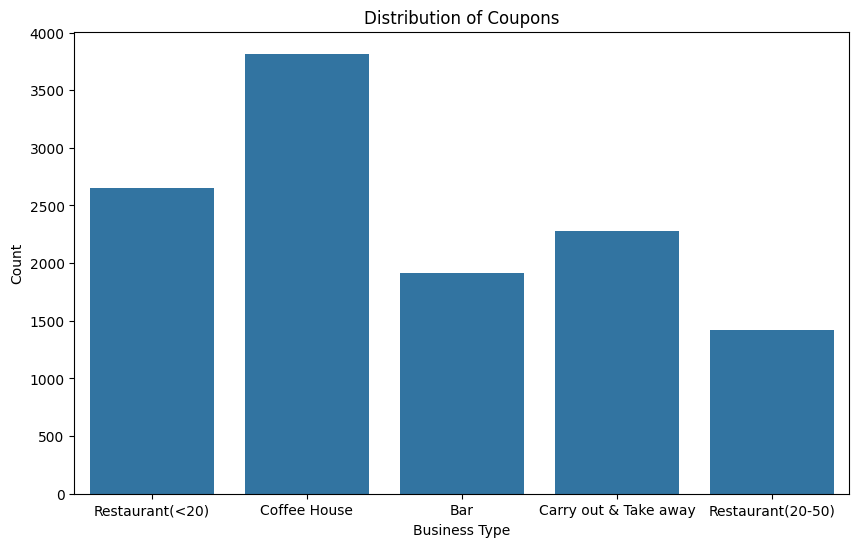

In [15]:
# A bar plot to visualize the coupon column.

plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', data=data)
plt.title('Distribution of Coupons')
plt.xlabel('Business Type')
plt.ylabel('Count')
plt.show()

6. Use a histogram to visualize the temperature column.

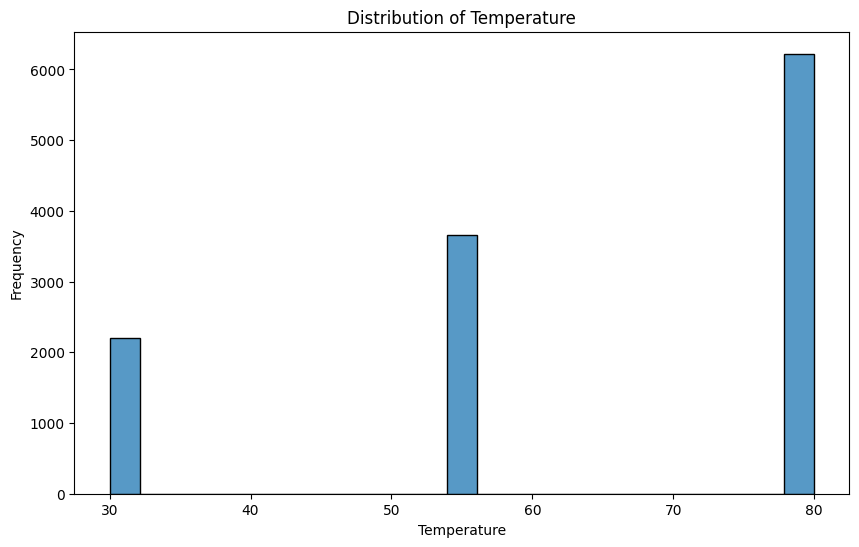

In [17]:
# Histogram to visualize the temperature column.

plt.figure(figsize=(10, 6))
sns.histplot(data['temperature']) # Use histplot for histograms
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [18]:
# Create a new DataFrame containing only bar coupons

bar_coupons = data[data['coupon'] == 'Bar']
print ("Total number of bar coupons " + str(len(bar_coupons)))

Total number of bar coupons 1913


2. What proportion of bar coupons were accepted?


In [20]:
# Calculate the proportion of accepted bar coupons

bar_coupons = data[data['coupon'] == 'Bar']
accepted_bar_coupons = bar_coupons[bar_coupons['Y'] == 1]
proportion_accepted = len(accepted_bar_coupons) / len(bar_coupons)

print("proportion of accepted bar coupons is " + str(proportion_accepted) )


proportion of accepted bar coupons is 0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [144]:
# Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


accepted_bar_coupons = bar_coupons[bar_coupons['Y'] == 1]

#print(len(accepted_bar_coupons))


frequent_bar_goers = accepted_bar_coupons[accepted_bar_coupons['Bar'] > 3]
accepted_coupons_frequent_goers = frequent_bar_goers[frequent_bar_goers['Y'] == 1]
#print(len(accepted_coupons_frequent_goers))
frequent_bar_goers_proportion_accepted = len(accepted_coupons_frequent_goers) / len(accepted_bar_coupons)

print("Acceptance proportion for those who went to a bar more than thrice in a month is " + str(frequent_bar_goers_proportion_accepted))

infrequent_bar_goers = bar_coupons[bar_coupons['Bar'] <= 3]
accepted_coupons_infrequent_goers = infrequent_bar_goers[infrequent_bar_goers['Y'] == 1]
#print(len(accepted_coupons_infrequent_goers))

infrequent_bar_goers_proportion_accepted = len(accepted_coupons_infrequent_goers) / len(accepted_bar_coupons)


print("Acceptance proportion for those who went to a bar less than thrice in a month is " + str(infrequent_bar_goers_proportion_accepted))



Acceptance proportion for those who went to a bar more than thrice in a month is 0.1865482233502538
Acceptance proportion for those who went to a bar less than thrice in a month is 0.8134517766497462


Only 18% of people who go to bar more than thrice accepted bar coupons. On the other hand, 81% of the poeple who go to bar less than thrice accepted bar coupons

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [145]:
# Compare acceptance rates between drivers who go to a bar more than once a month and are over 25, and all others.

bar_coupons = data[data['coupon'] == 'Bar']
accepted_bar_coupons = bar_coupons[bar_coupons['Y'] == 1]
#print(str(len(accepted_bar_coupons)))

# Target group 1 are people who go to a bar more than once a month and are over 25
target_group_1 = bar_coupons[(bar_coupons['Bar'] > 1) & (bar_coupons['age'] > 25) & (bar_coupons['Y'] ==1)]
#print(str(len(target_group_1)))

# Acceptance rate for the target group 1
acceptance_rate_tg1 = len(target_group_1) / len(accepted_bar_coupons)

print("Acceptance rate between drivers who go to a bar more than once a month and are over 25, and all who accepted bar coupons (Target Group 1) is " + str(acceptance_rate))

# Target group 2 are all the people who have accepted bar coupons
target_group_2 = accepted_bar_coupons

# Acceptance rate for the target group 2
acceptance_rate_tg2 = len(target_group_2) / len(bar_coupons)

print("Acceptance rate for all other drivers (Target Group 2) is " + str(acceptance_rate_tg2))


Acceptance rate between drivers who go to a bar more than once a month and are over 25, and all who accepted bar coupons (Target Group 1) is 0.5114213197969543
Acceptance rate for all other drivers (Target Group 2) is 0.41191845269210664


People who go to the bat more than once and are over 25 years of age accepts the bar coupons 10% more than overall bar acceptance rate

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [156]:
# Creating three target groups for each criteria defined in the problem:

# Start with total bar coupons accepted
bar_coupons = data[data['coupon'] == 'Bar']
accepted_bar_coupons = bar_coupons[bar_coupons['Y'] == 1]
print("Total number of accepted bar coupons are " + str(len(accepted_bar_coupons)))

# Target group 1 are the drivers who go to bars more than once a month
target_group_1 = bar_coupons[ (bar_coupons['Bar'] > 1) & (bar_coupons['Y'] ==1)]
print(str(len(target_group_1)))

# Acceptance rate for the target group 1
acceptance_rate_target_1 = len(target_group_1) / len(accepted_bar_coupons)

# Target group 2 are the drivers who have no kids
target_group_2 = bar_coupons[ (bar_coupons['Y'] ==1) & (bar_coupons['passanger'] != 'Kid(s)') ]
print(str(len(target_group_2)))

# Acceptance rate for the target group 2
acceptance_rate_target_2 = len(target_group_2) / len(accepted_bar_coupons)

# Target group 3 are the drivers who are not in farming, fishing, or forestry
target_group_3 = bar_coupons[ (bar_coupons['Y'] ==1) & (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry'])) ]
print(str(len(target_group_3)))

# Acceptance rate for the target group 3
acceptance_rate_target_3 = len(target_group_3) / len(accepted_bar_coupons)

print("Acceptance rate for target group 1 is " + str(acceptance_rate_target_1))
print("Acceptance rate for target group 2 is " + str(acceptance_rate_target_2))
print("Acceptance rate for target group 3 is " + str(acceptance_rate_target_3))


Total number of accepted bar coupons are 788
392
748
784
Acceptance rate for target group 1 is 0.49746192893401014
Acceptance rate for target group 2 is 0.949238578680203
Acceptance rate for target group 3 is 0.9949238578680203


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [152]:
# Create three target groups for each criterias:

# Target Group 1:  Bars > 1/month, no kids, not widowed
target_group_1 = bar_coupons[ (bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'Kid(s)') & (bar_coupons['maritalStatus'] != 'Widowed') ]
acceptance_rate_target_group_1 = len(target_group_1[target_group_1['Y'] == 1]) / len(target_group_1)

# Target Group 2: Bars > 1/month, age < 30
target_group_2 = bar_coupons[(bar_coupons['Bar'] > 1) & (bar_coupons['age'] < 30)]
acceptance_rate_target_group_2 = len(target_group_2[target_group_2['Y'] == 1]) / len(target_group_2)

# Target Group 3: Cheap restaurants > 4/month, income < 50K
target_group_3 = data[ (data['RestaurantLessThan20'] > 4) & (data['income'].isin(['$37500 - $49999', '$25000 - $37499', '$12500 - $24999', 'Less than $12500'])) ]
acceptance_rate_target_group_3 = len(target_group_3[target_group_3['Y'] == 1]) / len(target_group_3)

print("Acceptance Rate for Target Group 1 is " + str(acceptance_rate_target_group_1))
print("Acceptance Rate for Target Group 2 is " + str(acceptance_rate_target_group_2))
print("Acceptance Rate for Target Group 3 is " + str(acceptance_rate_target_group_3))


Acceptance Rate for Target Group 1 is 0.7094339622641509
Acceptance Rate for Target Group 2 is 0.7195121951219512
Acceptance Rate for Target Group 3 is 0.6025293586269196


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Total number of bar coupons 1913. Bar coupons acceptance rate is 41% which is lower than overall coupons acceptance which is ~57%.
There's a potential correlation between how often a driver visits bars and their likelihood of accepting a bar coupon.  
Acceptance proportion for those who went to a bar more than thrice in a month is 0.1865482233502538
Acceptance proportion for those who went to a bar less than thrice in a month is 0.8134517766497462


Acceptance rate for drivers who go to bars more than once a month 49%
Acceptance rate for drivers who have no kids pessanger with them 94%
Acceptance rate for drivers who are not in farming fishing & forestry 99%
These groups have high acceptance rate compared to overall coupon acceptance and bar coupon acceptance

Acceptance rate for drivers who went to the bar more than once/month, have no kids, and are not widowed is 70%
Acceptance rate for drivers bars > 1/month and their age is less than age 30 is 71%
Acceptance rate for drivers who gp to the restaraunts (less than $20 value) and have income < 50K is 60%
These groups have high acceptance rate compared to overall coupon acceptance and bar coupon acceptance

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In this section, I am investigating the impact of income range, age, occupation, temperature and distance on acceptance of food coupons (restaraunt dine-in and take-outs)

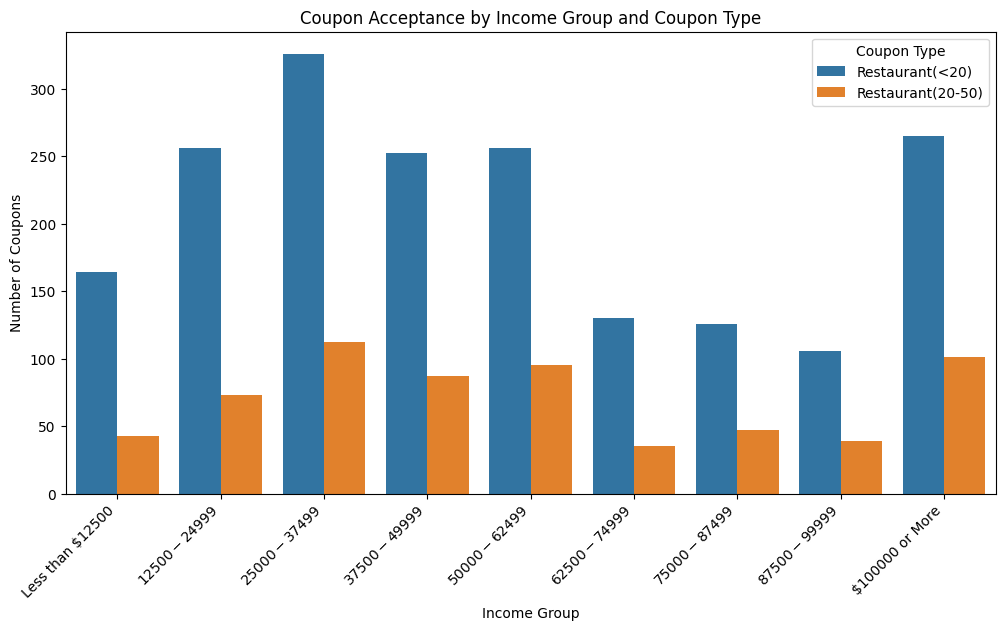

In [135]:
# A bar plot for coupon acceptance in each income group

data_dinein_restaraunts_only = data[((data['coupon'] == 'Restaurant(<20)') | (data['coupon'] == 'Restaurant(20-50)')) & (data['Y'] == 1)]

income_order = ['Less than $12500', '$12500 - $24999', '$25000 - $37499',
                '$37500 - $49999', '$50000 - $62499', '$62500 - $74999',
                '$75000 - $87499', '$87500 - $99999', '$100000 or More']

plt.figure(figsize=(12, 6))
sns.countplot(x='income', hue='coupon', data=data_dinein_restaraunts_only, order=income_order)
plt.title('Coupon Acceptance by Income Group and Coupon Type')
plt.xlabel('Income Group')
plt.ylabel('Number of Coupons')
plt.legend(title='Coupon Type')
plt.xticks(rotation=45, ha='right')
plt.show()


This shows that overall food coupons accepted for dine-in restaraunts for 'less than 20 dollar prince range' are higher than '$20-$50 prince range'. The difference is higher in the lower income group. Surprisingly, the difference is also higher in the highest income group that is $100,000 and more

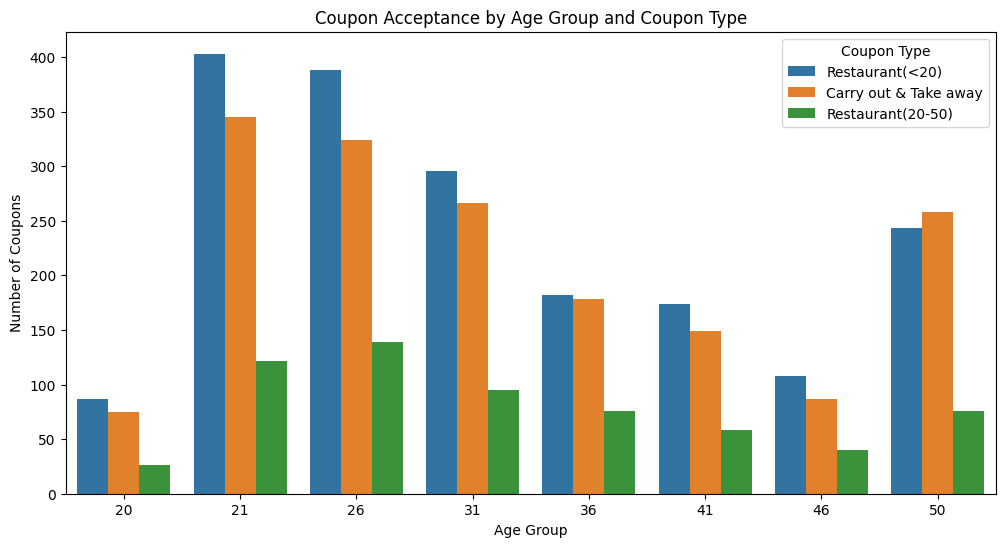

In [129]:
# A bar plot for coupon acceptance in each age group


data_accepted = data[data['Y'] == 1]
data_restaraunts_only = data_accepted[(data_accepted['coupon'] == 'Carry out & Take away') | (data_accepted['coupon'] == 'Restaurant(<20)') | (data_accepted['coupon'] == 'Restaurant(20-50)')]

plt.figure(figsize=(12, 6))
sns.countplot(x='age', hue='coupon', data=data_restaraunts_only)
plt.title('Coupon Acceptance by Age Group and Coupon Type')
plt.xlabel('Age Group')
plt.ylabel('Number of Coupons')
plt.legend(title='Coupon Type')
plt.show()

Most restaraunt coupons accepted are from the age group "21-35" and "higher than 51"

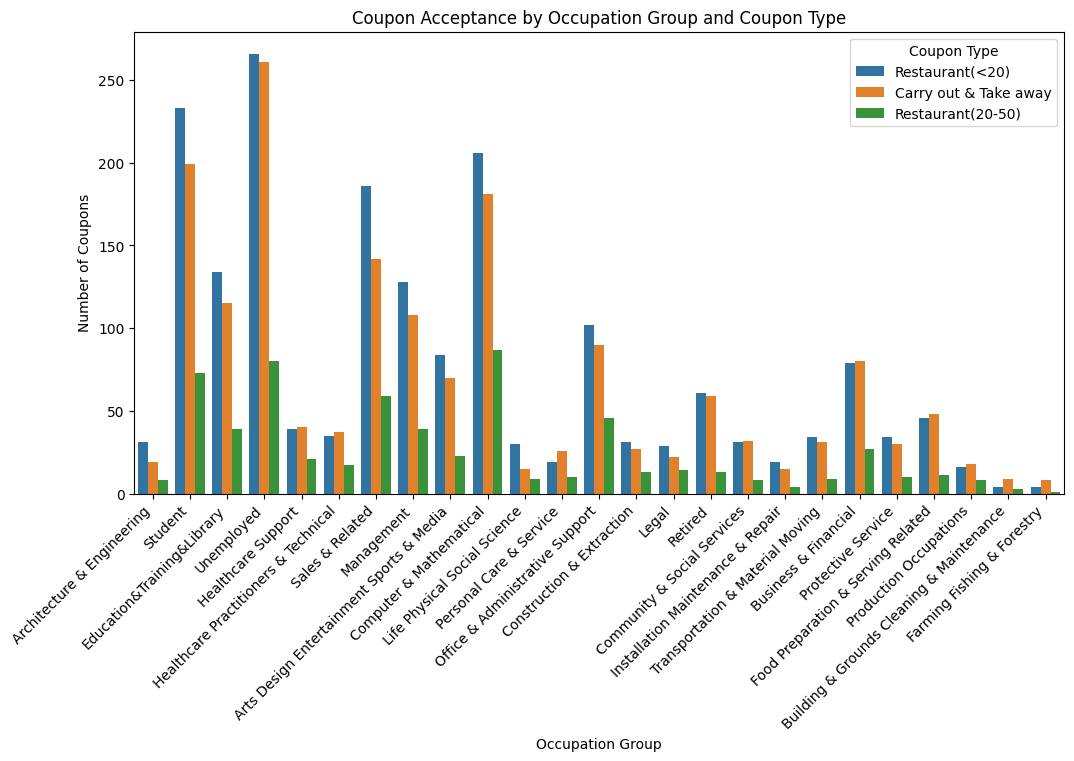

In [130]:
# The plot of occupation groups and count of coupons accepted for food represented by data_restaraunts_only = data_accepted[(data_accepted['coupon'] == 'Carry out & Take away') | (data_accepted['coupon'] == 'Restaurant(<20)') | (data_accepted['coupon'] == 'Restaurant(20-50)')]

data_accepted = data[data['Y'] == 1]
data_restaraunts_only = data_accepted[(data_accepted['coupon'] == 'Carry out & Take away') | (data_accepted['coupon'] == 'Restaurant(<20)') | (data_accepted['coupon'] == 'Restaurant(20-50)')]

plt.figure(figsize=(12, 6))
sns.countplot(x='occupation', hue='coupon', data=data_restaraunts_only)
plt.title('Coupon Acceptance by Occupation Group and Coupon Type')
plt.xlabel('Occupation Group')
plt.ylabel('Number of Coupons')
plt.legend(title='Coupon Type')
plt.xticks(rotation=45, ha='right')
plt.show()


The highest bars of coupons accepted are from the froup "Student" and "Unemployed". Next top two are "Sales" and Computers and mathematics"

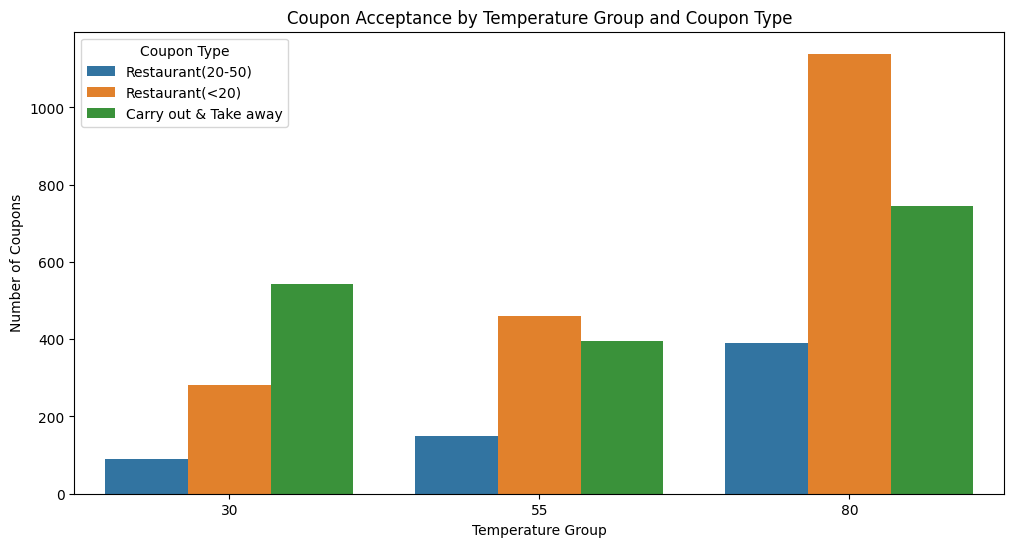

In [137]:
# The plot of temperature groups and count of food coupons accepted
data_accepted = data[data['Y'] == 1]
data_restaraunts_only = data_accepted[(data_accepted['coupon'] == 'Carry out & Take away') | (data_accepted['coupon'] == 'Restaurant(<20)') | (data_accepted['coupon'] == 'Restaurant(20-50)')]

plt.figure(figsize=(12, 6))
sns.countplot(x='temperature', hue='coupon', data=data_restaraunts_only)
plt.title('Coupon Acceptance by Temperature Group and Coupon Type')
plt.xlabel('Temperature Group')
plt.ylabel('Number of Coupons')
plt.legend(title='Coupon Type')
plt.show()


There is an uptick in all food coupon acceptance as the temparature increase from 55s to 80s. Between 30s and 55s, carry away is higher with lower temperatues. Coupons for restaraunt < 20 are always more accepted than "20-50" range.

In [132]:
# Analyze whether restaraunt location in same direction or opp direction makes a difference in coupon acceptance rate

# Calculate coupon acceptance  for driving direction and coupon type Restaurant (<20)
restaurant_lt_20_acceptance_towards = data[(data['coupon'] == 'Restaurant(<20)') & (data['Y'] == 1) & (data['direction_same'] == 1)]
restaurant_lt_20_acceptance_opposite = data[(data['coupon'] == 'Restaurant(<20)') & (data['Y'] == 1) & (data['direction_opp'] == 1)]

print("Restaraunt(<20) coupon acceptance driving in same directions " + str(len(restaurant_lt_20_acceptance_towards)))
print("Restaraunt(<20) coupon acceptance driving in opp directions " + str(len(restaurant_lt_20_acceptance_opposite)))

# Calculate coupon acceptance  for driving direction and coupon type Carry Out
carryout_acceptance_towards = data[(data['coupon'] == 'Carry out & Take away') & (data['Y'] == 1) & (data['direction_same'] == 1)]
carryout_acceptance_opposite = data[(data['coupon'] == 'Carry out & Take away') & (data['Y'] == 1) & (data['direction_opp'] == 1)]

print("Carry out coupon acceptance driving in same directtions " + str(len(carryout_acceptance_towards)))
print("Carry out coupon acceptance driving in opp directtions " + str(len(carryout_acceptance_opposite)))

# Calculate coupon acceptance  for driving direction and coupon type Restaurant (20-50)
restaurant_20_50_acceptance_towards = data[(data['coupon'] == 'Restaurant(20-50)') & (data['Y'] == 1) & (data['direction_same'] == 1)]
restaurant_20_50_acceptance_opp = data[(data['coupon'] == 'Restaurant(20-50)') & (data['Y'] == 1) & (data['direction_opp'] == 1)]

print("Restaraunt(20-50) coupon acceptance driving in same directtions " + str(len(restaurant_20_50_acceptance_towards)))
print("Restaraunt(20-50)) coupon acceptance driving in opp directtions " + str(len(restaurant_20_50_acceptance_opp)))


Restaraunt(<20) coupon acceptance driving in same directtions 306
Restaraunt(<20) coupon acceptance driving in opp directtions 1575
Carry out coupon acceptance driving in same directtions 535
Carry out coupon acceptance driving in opp directtions 1147
Restaraunt(20-50) coupon acceptance driving in same directtions 114
Restaraunt(20-50)) coupon acceptance driving in opp directtions 518


This data suggests that more food coupons were expected when driving in opposite direction of the restaraunt which is unexpected

In [133]:
# Analyze if driving time to restaraunt in more, does ti impact the coupon acceptance

data_restaraunts_only = data[(data['coupon'] == 'Carry out & Take away') | (data['coupon'] == 'Restaurant(<20)') | (data['coupon'] == 'Restaurant(20-50)')]
data_restaraunts_coupons_accepted = data_restaraunts_only[ (data['Y'] == 1)]

print("Total number of accepted restaraunts coupons (Carry Out, <20 and 20-50) are " + str(len(data_restaraunts_coupons_accepted)))

data_restaraunts_accepted_opp = data_restaraunts_only[ (data_restaraunts_only['Y'] == 1) & (data_restaraunts_only['direction_opp'] == 1)]
print("Total food coupons accepted when driving in opp direction " + str(len(data_restaraunts_accepted_opp)))

data_restaraunts_accepted_5mins = data_restaraunts_accepted_opp[ (data_restaraunts_accepted_opp['toCoupon_GEQ5min'] == 1) & (data_restaraunts_accepted_opp['toCoupon_GEQ15min'] == 0) | (data_restaraunts_accepted_opp['toCoupon_GEQ25min'] == 0)]
data_restaraunts_accepted_15mins = data_restaraunts_accepted_opp[ (data_restaraunts_accepted_opp['toCoupon_GEQ15min'] == 1) & (data_restaraunts_accepted_opp['toCoupon_GEQ25min'] == 0)]
data_restaraunts_accepted_25mins = data_restaraunts_accepted_opp[ (data_restaraunts_accepted_opp['toCoupon_GEQ25min'] == 1)]

print("Total food coupons accepted when driving in opp direction and restaraunt is 5 mins away " + str(len(data_restaraunts_accepted_5mins)))
print("Total food coupons accepted when driving in opp direction and restaraunt is 15 mins away " + str(len(data_restaraunts_accepted_15mins)))
print("Total food coupons accepted when driving in opp direction and restaraunt is 25 mins away " + str(len(data_restaraunts_accepted_25mins)))


Total number of accepted restaraunts coupons (Carry Out, <20 and 20-50) are 4195
Total food coupons accepted when driving in opp direction 3240
Total food coupons accepted when driving in opp direction and restaraunt is 5 mins away 2905
Total food coupons accepted when driving in opp direction and restaraunt is 15 mins away 1630
Total food coupons accepted when driving in opp direction and restaraunt is 25 mins away 335


<ipython-input-133-88917b4a6d4d>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_restaraunts_coupons_accepted = data_restaraunts_only[ (data['Y'] == 1)]


This shows as the distance (or time to travel) in opposite direction increases, the coupon acceptance decreases